<a href="https://colab.research.google.com/github/Juseong-Yu/CodeitdataScience/blob/main/Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
df = pd.read_csv('realdonaldtrump.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [5]:
#필요 없는 데이터는 제거
new_df = df[['content','retweets','favorites']]
new_df

,content,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,510,917
1,Donald Trump will be appearing on The View tom...,34,267
2,Donald Trump reads Top Ten Financial Tips on L...,13,19
3,New Blog Post: Celebrity Apprentice Finale and...,11,26
4,"""My persona will never be that of a wallflower...",1375,1945
...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,23402,116377
43348,Will be interviewed on @ seanhannity tonight a...,11810,56659
43349,pic.twitter.com/3lm1spbU8X,4959,19344
43350,pic.twitter.com/vpCE5MadUz,4627,17022


In [12]:
#글들을 정리해서 새로운 column에 정리
cleaned_list = []
def cleaning_code(text):
  text = text.lower() #대소문자 구분 없음
  text = re.sub(r"[^a-zA-Z0-9]", " ", text) #문자가 아닌것은 제거
  words = text.split() #토큰화

  cleaned_list.append(words)


for text in new_df['content']:
  cleaning_code(text)
new_df['cleaned'] = cleaned_list
new_df

,content,retweets,favorites,cleaned
0,Be sure to tune in and watch Donald Trump on L...,510,917,"[be, sure, to, tune, in, and, watch, donald, t..."
1,Donald Trump will be appearing on The View tom...,34,267,"[donald, trump, will, be, appearing, on, the, ..."
2,Donald Trump reads Top Ten Financial Tips on L...,13,19,"[donald, trump, reads, top, ten, financial, ti..."
3,New Blog Post: Celebrity Apprentice Finale and...,11,26,"[new, blog, post, celebrity, apprentice, final..."
4,"""My persona will never be that of a wallflower...",1375,1945,"[my, persona, will, never, be, that, of, a, wa..."
...,...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,23402,116377,"[joe, biden, was, a, total, failure, in, gover..."
43348,Will be interviewed on @ seanhannity tonight a...,11810,56659,"[will, be, interviewed, on, seanhannity, tonig..."
43349,pic.twitter.com/3lm1spbU8X,4959,19344,"[pic, twitter, com, 3lm1spbu8x]"
43350,pic.twitter.com/vpCE5MadUz,4627,17022,"[pic, twitter, com, vpce5maduz]"


In [28]:
#불용어 제거 작업
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


In [31]:
stop_words_list = stopwords.words('english')
for text in new_df['cleaned']:
  for word in text:
    if word in stop_words_list:
      text.remove(word)

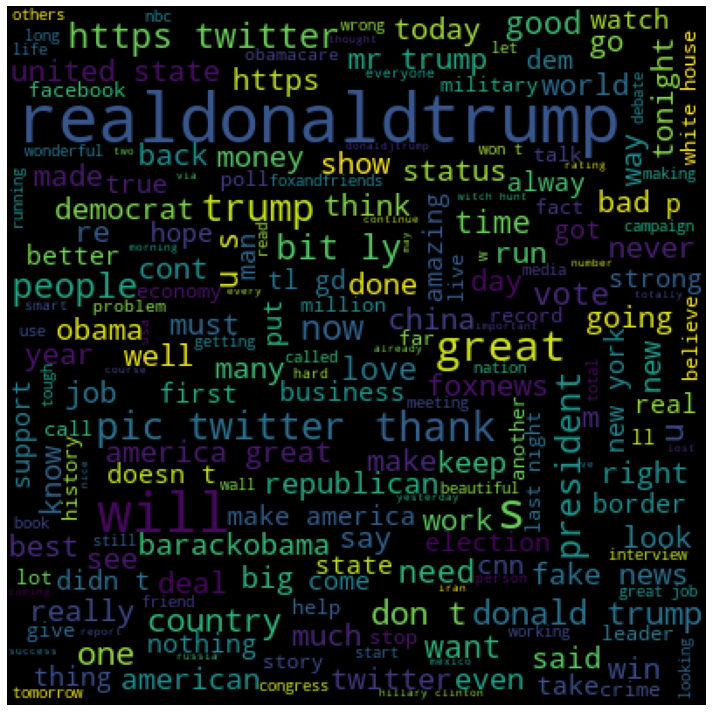

In [19]:
# 문자열 결합
string_data = ''
for text in new_df['cleaned']:
  string_data += " ".join(text)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

In [75]:
from collections import Counter
count_list = []
for i in new_df['cleaned']:
  count_list += i
c = Counter(count_list)

Counter({'realdonaldtrump': 8788, 'com': 8332, 'great': 6777, 'trump': 6616, 'twitter': 5676, 'http': 4933, 'thank': 3060, 'president': 3055, 'https': 2928, 'people': 2740, 'pic': 2617, 'donald': 2357, 'thanks': 2338, 'www': 2147, 'new': 2045, 'would': 2020, 'country': 2014, 'get': 1985, 'america': 1915, 'ly': 1898, 'obama': 1834, 'bit': 1814, 'big': 1788, 'status': 1765, 'time': 1758, 'like': 1750, 'good': 1706, 'one': 1652, 'make': 1592, 'news': 1585, 'u': 1569, 'the': 1560, 'never': 1502, 'many': 1445, 'today': 1326, 'us': 1314, 'vote': 1259, 'going': 1259, 'back': 1244, 'much': 1237, 'run': 1218, 'best': 1141, 'want': 1135, 'see': 1107, 'democrats': 1093, 'love': 1084, 'job': 1083, 'need': 1066, 'think': 1041, 'even': 1031, 'must': 1031, 'china': 1004, 'really': 1001, 'a': 998, 'go': 994, 'true': 971, 'years': 971, 'fake': 934, 'hillary': 934, 'show': 925, 'media': 925, 'last': 924, 'american': 922, 'world': 919, 'way': 916, 'know': 912, 'bad': 912, 'win': 911, 'work': 893, 'day': 

In [73]:
#가장 많이 나온 단어 10개
c.most_common(10)

[('realdonaldtrump', 8788),
 ('com', 8332),
 ('great', 6777),
 ('trump', 6616),
 ('twitter', 5676),
 ('http', 4933),
 ('thank', 3060),
 ('president', 3055),
 ('https', 2928),
 ('people', 2740)]

In [81]:
new_df.sort_values(by = 'retweets', ascending = False)

,content,retweets,favorites,cleaned
32051,# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg,302269,515729,"[fraudnewscnn, fnnpic, twitter, com, wyunhjjujg]"
30888,TODAY WE MAKE AMERICA GREAT AGAIN!,289872,508758,"[today, make, america, great]"
15533,Are you allowed to impeach a president for gro...,242667,235119,"[allowed, impeach, president, gross, incompete..."
38615,A$AP Rocky released from prison and on his way...,232085,835575,"[ap, rocky, released, prison, way, home, unite..."
43026,The United States of America will be designati...,224890,828937,"[united, states, america, designating, antifa,..."
...,...,...,...,...
6409,@eddiecash23 Great and best of luck!,0,1,"[eddiecash23, great, best, luck]"
10859,@ BrianRyback Thank you Brian and good luck.,0,2,"[brianryback, thank, brian, good, luck]"
5509,@Jarboni72 @ billmaher Thanks!,0,0,"[jarboni72, billmaher, thanks]"
6414,@ DalHines Thanks--they are good kids!,0,4,"[dalhines, thanks, good, kids]"


In [83]:
new_df.sort_values(by = 'favorites', ascending = False)

,content,retweets,favorites,cleaned
38615,A$AP Rocky released from prison and on his way...,232085,835575,"[ap, rocky, released, prison, way, home, unite..."
43026,The United States of America will be designati...,224890,828937,"[united, states, america, designating, antifa,..."
43000,CHINA!,152666,799634,[china]
40948,pic.twitter.com/VXeKiVzpTf,163102,780753,"[pic, twitter, com, vxekivzptf]"
40979,All is well! Missiles launched from Iran at tw...,149644,737415,"[well, missiles, launched, iran, two, military..."
...,...,...,...,...
8272,@ emilyplacido @ foxandfriends @ IvankaTrump T...,2,0,"[emilyplacido, foxandfriends, ivankatrump, tha..."
5547,@ MichaelRhorer @ billmaher Thanks.,0,0,"[michaelrhorer, billmaher, thanks]"
5546,@ tazracet Thanks.,0,0,"[tazracet, thanks]"
5544,@henriwts @ BaetensGert Yes.,0,0,"[henriwts, baetensgert, yes]"
